In [1]:
!pip install torch
!pip install torchtext
!python -m spacy download en
!pip install scapy

# K80 gpu for 12 hours
import torch
from torch import nn, optim
# from torchtext import datasets
from torchtext.legacy import data,datasets

print('GPU:', torch.cuda.is_available())

torch.manual_seed(123)

     |████████████████████████████████| 12.0 MB 6.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
GPU: True


In [2]:
print('GPU:', torch.cuda.is_available())

GPU: True


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
!nvidia-smi

Wed Apr 13 21:48:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install torchprob

ERROR: Could not find a version that satisfies the requirement torchprob (from versions: none)
ERROR: No matching distribution found for torchprob


In [15]:
import torch
import torch.nn as nn
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.utils import save_image
from torch.autograd import Variable, grad
import random
import os
import natsort
from PIL import Image, ImageOps, ImageEnhance
import matplotlib.pyplot as plt
import functools



class Discriminator(nn.Module):
    def __init__(self, input_size, features):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 512 x 512
            # nn.Conv2d(input_size, features, 4, 2, 1, bias=False),
            # nn.LeakyReLU(0.2, inplace=True),
            # # input is (nc) x 256 x 256
            # nn.Conv2d(input_size, features, 4, 2, 1, bias=False),
            # nn.LeakyReLU(0.2, inplace=True),
            # input is (nc) x 128 x 128
            # nn.Conv2d(features, features, 4, 2, 1, bias=False),
            # nn.LeakyReLU(0.2, inplace=True),
            # input is (nc) x 64 x 64
            nn.Conv2d(input_size, features, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(features, features * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(features * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(features * 2, features * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(features * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(features * 4, features * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(features * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(features * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, z, feature_matching = False):
        return self.main(z)
    

class Generator(nn.Module):
    def __init__(self, input_size, channels_img, features):
        super(Generator, self).__init__()

        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( input_size, features * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(features * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(features * 8, features * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(features * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( features * 4, features * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(features * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( features * 2, features , 4, 2, 1, bias=False),
            nn.BatchNorm2d(features),
            nn.ReLU(True),

            nn.ConvTranspose2d( features, channels_img, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (ngf) x 64 x 64

        )

    def forward(self, x):
        return self.main(x)


def initialize_weights(model):
    # Initializes weights according to the DCGAN paper
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.normal_(m.weight.data, 0.0, 0.02)


mkdir: cannot create directory ‘ridiculous7’: File exists


In [16]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

D_LEARNING_RATE = 2e-4
G_LEARNING_RATE = 1e-4
BATCH_SIZE = 64
IMAGE_SIZE = 64
CHANNELS_IMG = 3
NOISE_DIM = 128
NUM_EPOCHS = 100
FEATURES_DISC = 64
FEATURES_GEN = 64
epochs = 500
lambda_gragan = 10


dataset = datasets.ImageFolder(root="/content/drive/MyDrive/Colab Notebooks/data",
                           transform=transforms.Compose([
                               transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
#                                transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)
gen = Generator(NOISE_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)

initialize_weights(gen)
initialize_weights(disc)



opt_gen = optim.Adam(gen.parameters(), lr=G_LEARNING_RATE, betas=(0.5, 0.99))
opt_disc = optim.Adam(disc.parameters(), lr=D_LEARNING_RATE, betas=(0.5, 0.99))
criterion = nn.BCELoss()

fixed_noise = torch.randn(16, NOISE_DIM, 1, 1).to(device)

step = 0

gen.train()
disc.train()
            


Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [18]:
def train(epoch, gen, opt_gen, disc, opt_disc, step):
    # dummy assignment until this function is filled in
    discriminator_loss = 0
    generator_loss = 0
    average_discriminator_loss = 0
    average_generator_loss = 0
    for batch_idx, (img, _) in enumerate(dataloader):
        # print(batch_idx, len(dataloader))
        b_size = len(img)
        img = img.to(device)
        noise = torch.randn(b_size, 128, 1, 1).to(device)
        # print('here')
        gen_fake = gen(noise)
        # print('img', img.shape)
        
        disc_real = disc(img).reshape(-1)
        # print('fake', gen_fake.shape)
        disc_fake = disc(gen_fake.detach()).reshape(-1)
        # print('here')
        real_label = torch.ones_like(disc_real).to(device)
        fake_label = torch.zeros_like(disc_fake).to(device)
        loss_fake = criterion(disc_fake, fake_label)
        loss_real = criterion(disc_real, real_label)
#         print('1 fixed')
        loss_d = (loss_real + loss_fake)/2
        discriminator_loss += loss_d.item()
        
        disc.zero_grad()
        loss_d.backward()
        opt_disc.step()
        
        output = disc(gen_fake).reshape(-1)
        real_label_2 = torch.ones_like(output).to(device)
        loss_g = criterion(output, real_label_2)
        generator_loss += loss_g.item()
        
        gen.zero_grad()
        loss_g.backward()
        opt_gen.step()
        
        if batch_idx % 10 == 0:
            print('Discriminator Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(img), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss_d.item() ))
            print('Generator Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(img), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss_g.item() ))
            if epoch % 5 ==0 :
                sample = torch.randn(16, 128, 1, 1).to(device)
                sample = gen(sample).detach().cpu()
                # print(sample.size())  # torch.Size([8, 1, 28, 28])
                images = torchvision.utils.make_grid(sample[:16], normalize=True)
                save_image(sample, "/content/drive/MyDrive/ridiculous64_1/epoch{}-iteration{}-fake_img.jpg".
                          format(epoch , batch_idx), normalize=True, scale_each=True)
                # display(Image('results/sample_' + str(epoch) + '.png'))
    average_discriminator_loss = discriminator_loss / len(dataloader.dataset)
    average_generator_loss = generator_loss / len(dataloader.dataset)
    print('====> Discriminator Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_discriminator_loss))
    print('====> Generator Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_generator_loss))
    return average_generator_loss, average_discriminator_loss
        

In [19]:
def _sample_line(real, fake):
    shape = [real.size(0)] + [1] * (real.dim() - 1)
    alpha = torch.rand(shape, device=real.device)
    sample = real + alpha * (fake - real)
    return sample


def _sample_DRAGAN(real, fake):  # fake is useless
    beta = torch.rand_like(real)
    fake = real + 0.5 * real.std() * beta
    sample = _sample_line(real, fake)
    return sample

def _norm(x):
    norm = x.view(x.size(0), -1).norm(p=2, dim=1)
    return norm

def _one_mean_gp(grad):
    norm = _norm(grad)
    gp = ((norm - 1)**2).mean()
    return gp

def gradient_penalty(f, real, fake):
    # x = _sample_DRAGAN(real, fake).detach()
    x = _sample_DRAGAN(real, fake)
    x.requires_grad = True
    pred = f(x)
    grad = torch.autograd.grad(pred, x, grad_outputs=torch.ones_like(pred), create_graph=True)[0]
    gp = _one_mean_gp(grad)
    return gp


In [20]:
def gragan_train(epoch, gen, opt_gen, disc, opt_disc, step):
    discriminator_loss = 0
    generator_loss = 0
    average_discriminator_loss = 0
    average_generator_loss = 0
    for batch_idx, (img, _) in enumerate(dataloader):
        # print(batch_idx, len(dataloader))
        b_size = len(img)
        img = img.to(device)
        noise = torch.randn(b_size, 128, 1, 1).to(device)
        # print('here')
        gen_fake = gen(noise)
        # print('img', img.shape)
        
        disc_real = disc(img).reshape(-1)
        # print('fake', gen_fake.shape)
        disc_fake = disc(gen_fake.detach()).reshape(-1)
        # print('here')
        real_label = torch.ones_like(disc_real).to(device)
        fake_label = torch.zeros_like(disc_fake).to(device)
        loss_fake = criterion(disc_fake, fake_label)
        loss_real = criterion(disc_real, real_label)
#         print('1 fixed')
        gradient_p = gradient_penalty(functools.partial(disc), img, gen_fake)
        print(gradient_p)

        loss_d = (loss_real + loss_fake)/2 + gradient_p * lambda_gragan
        # loss_d = (loss_real + loss_fake)/2
        discriminator_loss += loss_d.item()
        
        disc.zero_grad()
        loss_d.backward()
        opt_disc.step()

        output = disc(gen_fake).reshape(-1)
        real_label_2 = torch.ones_like(output).to(device)
        loss_g = criterion(output, real_label_2)
        generator_loss += loss_g.item()
        
        gen.zero_grad()
        loss_g.backward()
        opt_gen.step()
        
        if batch_idx % 10 == 0:
            print('Discriminator Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(img), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss_d.item() ))
            print('Generator Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(img), len(dataloader.dataset),
                100. * batch_idx / len(dataloader),
                loss_g.item() ))
            if epoch % 5 ==0 :
            
                sample = torch.randn(16, 128, 1, 1).to(device)
                sample = gen(sample).detach().cpu()
                # print(sample.size())  # torch.Size([8, 1, 28, 28])
                images = torchvision.utils.make_grid(sample[:16], normalize=True)
      
                save_image(sample, "/content/drive/MyDrive/ridiculous_gragan/epoch{}-iteration{}-fake_img.jpg".
                          format(epoch , batch_idx), normalize=True, scale_each=True)
                # display(Image('results/sample_' + str(epoch) + '.png'))
    average_discriminator_loss = discriminator_loss / len(dataloader.dataset)
    average_generator_loss = generator_loss / len(dataloader.dataset)
    print('====> Discriminator Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_discriminator_loss))
    print('====> Generator Epoch: {} Average loss: {:.4f}'.format(
          epoch, average_generator_loss))
    return average_generator_loss, average_discriminator_loss

In [21]:
def main():
    discriminator_average_train_losses = []
    generator_average_train_losses = []
    for epoch in range(1, epochs + 1):
        #run the follow code to train GRAGAN
        generator_average_train_loss, discriminator_average_train_loss = gragan_train(epoch, gen, opt_gen, disc, opt_disc, step)
        #run the follow code to train DCGAN
        # generator_average_train_loss, discriminator_average_train_loss = train(epoch, gen, opt_gen, disc, opt_disc, step)

        discriminator_average_train_losses.append(discriminator_average_train_loss)
        generator_average_train_losses.append(generator_average_train_loss)
        if epoch % 50 == 0:
            torch.save(gen.state_dict(), "/content/drive/MyDrive/models_gragan/epoch{}-generator_model.pt".format(epoch))
            torch.save(disc.state_dict(), "/content/drive/MyDrive/models_gragan/epoch{}-discriminator_model.pt".format(epoch))
            torch.save(gen.state_dict(), "/content/drive/MyDrive/models_gragan/epoch{}-Generator.pkl".format(epoch))
            torch.save(gen.state_dict(), "/content/drive/MyDrive/models_gragan/epoch{}-discriminator.pkl".format(epoch))

    # Plot Train losses
    plt.plot(discriminator_average_train_losses)
    plt.plot(generator_average_train_losses)
    plt.title('Train BCE Losses')
    plt.ylabel('Binary Cross Entropy')
    plt.xlabel('Epoch #')
    plt.legend(['Discriminator','Generator'], loc='upper right')
    plt.show()
    
    

流式输出内容被截断，只能显示最后 5000 行内容。
tensor(0.0051, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0021, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0043, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0236, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0039, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0029, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0057, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0035, device='cuda:0', grad_fn=<MeanBackward0>)
Discriminator Train Epoch: 349 [1280/1578 (80%)]	Loss: 0.255431
Generator Train Epoch: 349 [1280/1578 (80%)]	Loss: 2.723980
tensor(0.0041, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0028, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(0.0109, device='cuda:0', grad_fn=<MeanBackward0>)
====> Discriminator Epoch: 349 Average loss: 0.0049
====> Generator Epoch: 349 Average loss: 0.0391
tensor(0

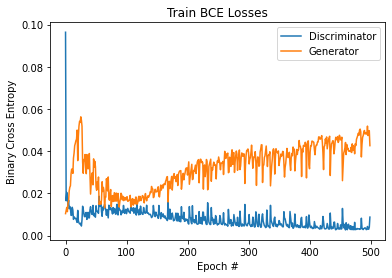

In [22]:
if __name__ == '__main__':
    main()
    
    